In [11]:
#Importing the required libraries
import nltk
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
#Required downloads for the nltk library to run.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# ------------------------ 1. Sentiment Analysis Function ---------------------
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [17]:
# ------------------------ 2. Enhanced Chatbot Response Function--------------------
def chatbot_response(user_input, sentiment):
    user_input = user_input.lower()

    positive_terms = [
        "happy", "joyful", "great", "excellent", "fantastic", "amazing", "wonderful", "good", "love", "like", "excited",
        "delighted", "pleased", "cheerful", "content", "blissful", "ecstatic", "radiant", "optimistic", "positive",
        "superb", "terrific", "outstanding", "brilliant", "marvelous", "fabulous", "awesome", "cool", "glad",
        "fortunate", "lucky", "satisfied", "thankful", "grateful", "peaceful", "calm", "serene", "friendly", "kind",
        "generous", "helpful", "supportive", "encouraging", "hopeful", "vibrant", "energetic", "passionate",
        "enthusiastic", "lively", "spirited", "vibrant", "thrilled", "elated", "uplifted", "smiling", "laughing",
        "charming", "lovely", "adorable", "cute", "sweet", "precious", "graceful", "elegant", "smooth", "easy", "fun",
        "amusing", "entertaining", "enjoyable", "relaxing", "restful", "comfy", "cozy", "warm", "bright", "clear",
        "sunny", "safe", "secure", "protected", "confident", "strong", "powerful", "successful", "victorious", "triumphant",
        "smart", "clever", "intelligent", "wise", "creative", "innovative", "talented", "skillful", "capable",
        "effective", "efficient", "reliable", "trustworthy", "genuine", "authentic", "real", "true", "honest",
        "fair", "just", "reasonable", "logical", "practical", "useful", "valuable", "significant", "meaningful"
    ]

    negative_terms = [
        "sad", "unhappy", "bad", "terrible", "awful", "horrible", "hate", "dislike", "angry", "frustrated",
        "depressed", "miserable", "gloomy", "down", "pessimistic", "negative", "poor", "inferior", "dreadful",
        "appalling", "atrocious", "offensive", "repulsive", "disgusting", "nasty", "vile", "sick", "ill",
        "worried", "anxious", "nervous", "scared", "frightened", "terrified", "fearful", "helpless", "hopeless",
        "useless", "worthless", "inadequate", "insufficient", "deficient", "lacking", "weak", "feeble",
        "fragile", "vulnerable", "exhausted", "tired", "drained", "empty", "bored", "dull", "tedious", "monotonous",
        "lonely", "isolated", "alone", "abandoned", "rejected", "neglected", "ignored", "unloved", "bitter",
        "resentful", "jealous", "envious", "suspicious", "cynical", "skeptical", "disappointed", "let down",
        "defeated", "failed", "unsuccessful", "lost", "wrong", "mistaken", "incorrect", "false", "untrue",
        "dishonest", "unfair", "unjust", "biased", "irrational", "illogical", "impractical", "useless",
        "harmful", "dangerous", "risky", "threatening", "violent", "cruel", "brutal", "harsh", "severe", "strict"
    ]

    if "hello" in user_input or "hi" in user_input:
        return "Hello there! How can I help you?"
    elif "how are you" in user_input:
        return "I'm doing well, thanks for asking!"
    elif "thank you" in user_input:
        return "You're welcome!"
    elif "goodbye" in user_input or "bye" in user_input:
        return "Goodbye! Have a great day."
    elif any(term in user_input for term in positive_terms):
        if sentiment == "Positive":
            return "That's awesome! I'm glad you're feeling great."
        elif sentiment == "Negative":
            return "That's great that your using positive terms, but I sense you feel down."
        else:
             return "Nice to see you use a positive term, how can I help"

    elif any(term in user_input for term in negative_terms):
        if sentiment == "Negative":
            return "I'm sorry you're feeling that way. Is there anything I can do to help?"
        elif sentiment == "Positive":
            return "That's strange as you sound positive, but use negative words."
        else:
            return "Is there a problem I can help with?"
    elif sentiment == "Positive":
        return "That's great to hear!"
    elif sentiment == "Negative":
        return "I'm sorry to hear that."
    else:
       return "I understand. How can I help you?"

In [19]:
# ------------------------ 3. Main Chatbot Loop -------------------------------
def chatbot():
    print("Chatbot: Hello! I'm ready to chat. Type 'exit' to end the conversation.")
    sentiment_history = []
    prompt_count = 0

    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
           print("Chatbot: Goodbye!")
           break

        sentiment = analyze_sentiment(user_input)
        sentiment_history.append(sentiment)

        response = chatbot_response(user_input, sentiment)
        print(f"Chatbot ({sentiment}): {response}")

        prompt_count += 1
        if prompt_count % 10 == 0 and prompt_count > 0:  # Changed condition to 10
            plot_sentiment_distribution(sentiment_history, prompt_count)

In [21]:
# ------------------------ 4. Plotting Function -------------------------------
def plot_sentiment_distribution(sentiment_history, prompt_count):
    sentiments = ['Positive', 'Negative', 'Neutral']
    sentiment_counts = {sentiment: sentiment_history.count(sentiment) for sentiment in sentiments}
    values = list(sentiment_counts.values())

    plt.figure(figsize=(8, 6))
    bars = plt.bar(sentiments, values, color=['green', 'red', 'gray'])
    plt.title(f'Sentiment Distribution After {prompt_count} Prompts')
    plt.ylabel('Count')
    plt.xlabel('Sentiment')

    # Adding the count label on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.show()
    # if the plots are interfering add plt.close() to clear plots
    #plt.close()

Chatbot: Hello! I'm ready to chat. Type 'exit' to end the conversation.


You:  Hi how are you doing


Chatbot (Neutral): Hello there! How can I help you?


You:  I am good


Chatbot (Positive): That's awesome! I'm glad you're feeling great.


You:  I am feeling very optimistic.


Chatbot (Positive): That's awesome! I'm glad you're feeling great.


You:  I am feeling also hopeless.


Chatbot (Negative): I'm sorry you're feeling that way. Is there anything I can do to help?


You:  Yes can you tell me something that is positive itself.


Chatbot (Positive): Hello there! How can I help you?


You:  Hi I am very bad at maths.


Chatbot (Negative): Hello there! How can I help you?


You:  Can you help me be optimistic


Chatbot (Positive): That's awesome! I'm glad you're feeling great.


You:  I am feeling for that vile man 


Chatbot (Negative): I'm sorry you're feeling that way. Is there anything I can do to help?


You:  I am also feeling that the man in the bus was very generous.


Chatbot (Positive): That's awesome! I'm glad you're feeling great.


You:  I also feel that the world holds so much promise.


Chatbot (Positive): That's great to hear!


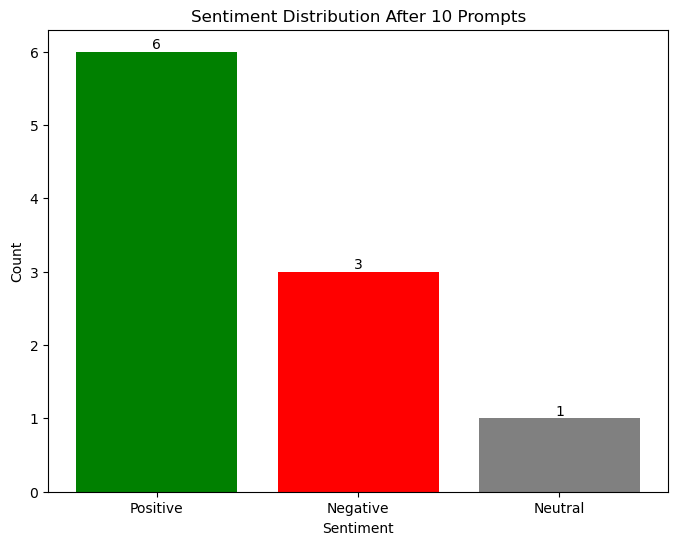

In [ ]:
if __name__ == "__main__":
    chatbot()